In [16]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Load the Data
df = pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [18]:
# Exploratory Data Analysis (EDA)
#Check for missing values and data types
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

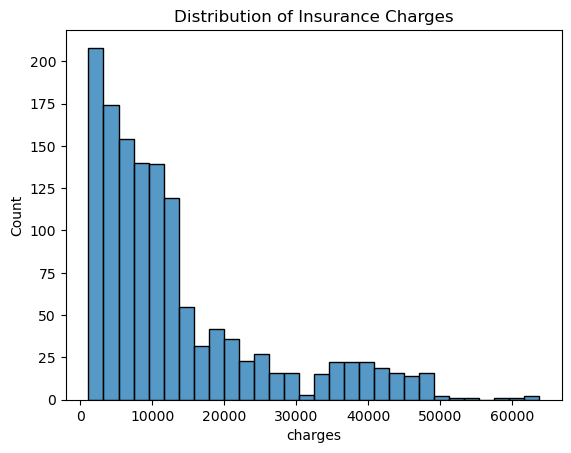

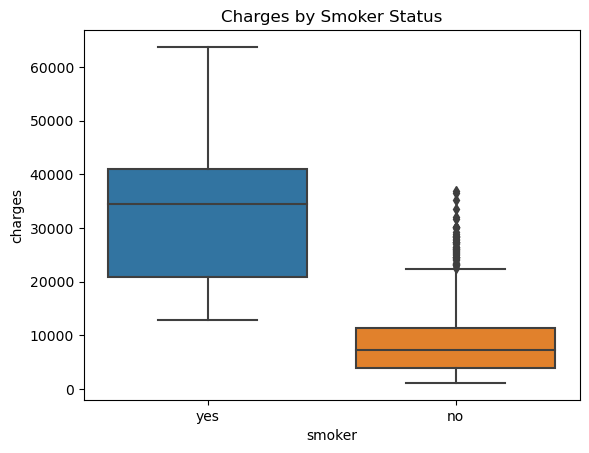

In [19]:
#- Visualize distributions
sns.histplot(df['charges'], bins=30)
plt.title('Distribution of Insurance Charges')
plt.show()

sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()

C:\Users\CANARA\AppData\Local\Temp\ipykernel_4884\446329957.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


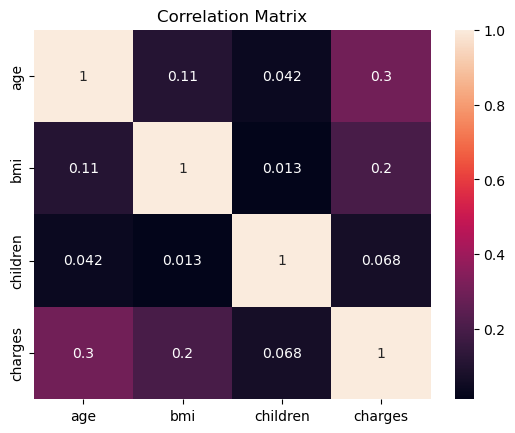

In [20]:
#Correlation Analysis
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [21]:
#Feature Engineering (if needed)
#Convert categorical variables to numerical:


df = pd.get_dummies(df, drop_first=True)


In [23]:
# Predictive Modeling
# Predicting Insurance Charges
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('charges', axis=1)
y = df['charges']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
#Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 33596915.85136145
R2 Score: 0.7835929767120724


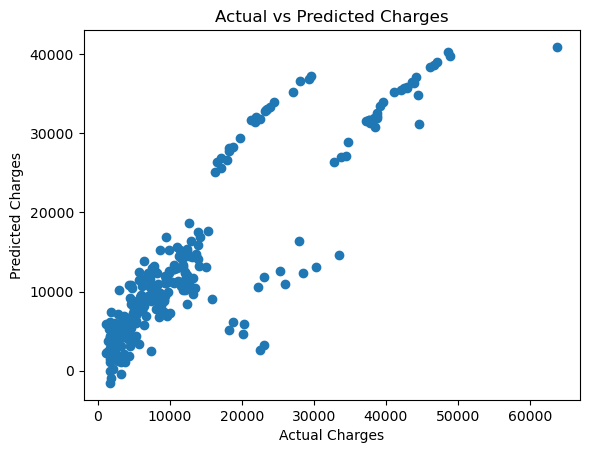

In [27]:
#Visualization of Predicted vs Actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

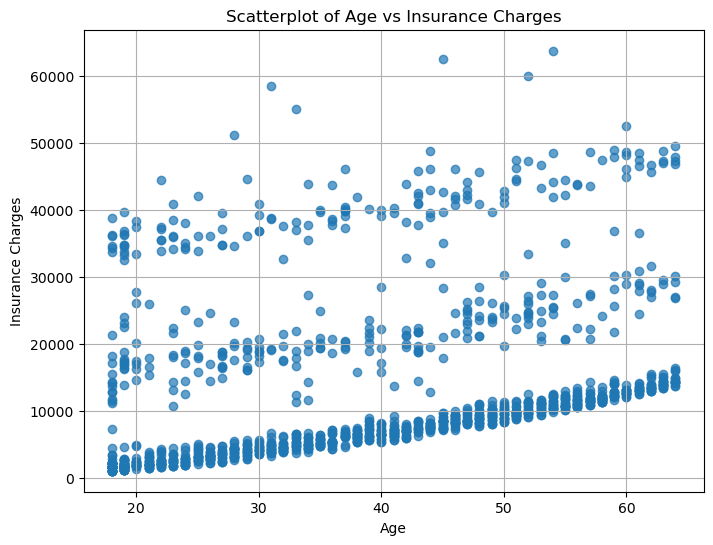

In [28]:
# Scatter plot: Age vs Insurance Charges
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['charges'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.title('Scatterplot of Age vs Insurance Charges')
plt.grid(True)
plt.show()